# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0381 Михайлов Виктор и Прохоров Борис. Вариант №8.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

* **Дискретный сигнал** $x_0, x_1, ..., x_{N-1}$:    
  Получается при дискретизации аналогового  сигнала $s(t)$.   
  Будем считать, что отcчёты $x_k, k = 0,1,...,N - 1$ дискретного сигнала получены в результаты равномерной дискретизации сигнала $s(t)$ с шагом дискретизации, равным единице:  $$x_k = s(t_k), k = 0, 1, ..., N - 1;$$ $$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$


* **Спектр дискретного сигнала**:  
  Представим дискретный сигнал как функцию от времени: $$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
  Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$: $$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$

* **Дискретное преобразование Фурье**:  
  Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$: $$x_{k+N} = x_k \space\space\space\space\forall k$$
  Рассмотрим фрагмент последовательности из N отсчётов.  
  Например, $\{x_k: k = 0,1,2,...,N-1\}$. Тогда дискретная функция $$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$$ тоже будет периодической, с периодом $NT$. Здесь $T$ - период дискретизации.  
  Спектр $s(t)$ также должен быть периодическим (с периодом $T = \frac{2\pi}{T}$) и дискретным с расстоянием между гармониками $\frac{2\pi}{NT}$.  
  Поскольку $s(t)$ периодическая функция, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по следующей формуле: $$X(n) = \frac{1}{NT}\sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$

* **Формула численного дифференцирования 1-го порядка**:
  
  $y_n= \frac {s_{n+1} - s_{n−1}} {2h},\ h=T=1$.

  Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда
  $H(\omega) = i\sin (\omega)$

* **Формула трапеций**:
  
  $y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$.<br>

 Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда $H(\omega) = \frac {\cos {\frac \omega 2}}{2i \sin {\frac \omega 2}}$


 * **Формула прямоугольников**:
  
  $y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$.
  Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда $H(\omega) = \frac 1 {2i \sin {\frac \omega t}}$


 * **Формула Симпсона**:

  $y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$<br>

  Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда $H(\omega) = \frac {\cos {\omega} + 2}{3i \sin {\omega}}$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Импорт необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

### 1-2. Сформируем дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(ω_kt+φ_k)$. Частота каждой из гармоник не должна превышать $π$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $π$, изменяющимися с шагом $Δω=0.1π$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.  
###И визуализируем исходные аналоговый и дискретизированный сигналы.

In [ ]:
# Генерация аналогового сигнала
def signal(t):
  A = []
  W = [(x/10)*math.pi for x in range(0, 11, 1)]
  phi = []
  for i in range(10):
    A.append(random.randint(1, 11))
    phi.append(random.uniform(0, 0.5))

  res = np.linspace(0, 0, 256)
  for A_i, phi_i, w_i in zip(A, phi, W):
    res += A_i*np.cos(np.array(w_i*t) + phi_i)
  return res

In [ ]:
# Дискретизация
def discretization(s, N):
  res = []
  for t in N:
      res.append(s[int(t)*8])
  return res

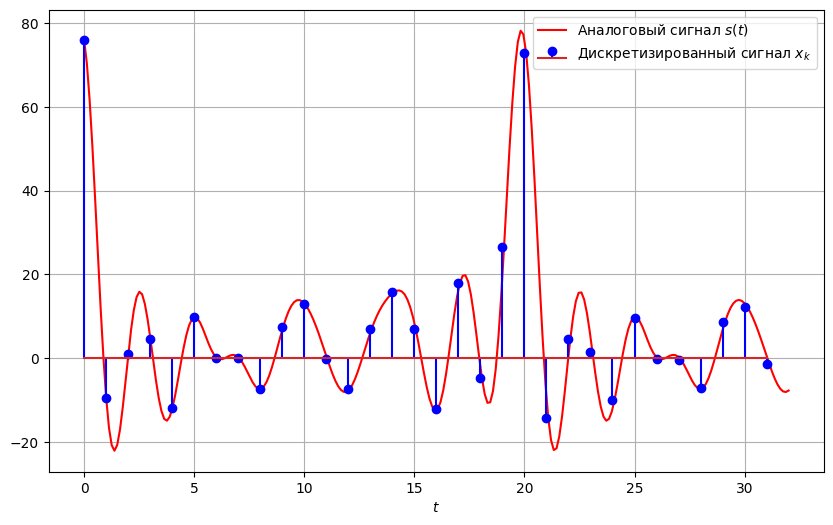

In [ ]:
analog_arg = np.linspace(0, 32, 256)

y = signal(analog_arg)

N_arg = np.linspace(0, 31, 32)
y_d = discretization(y, N_arg)

plt.figure(figsize=(10, 6))
plt.xlabel(r'$t$')
plt.grid()
plt.plot(analog_arg, y, 'red', label='Аналоговый сигнал $s(t)$')
plt.stem(N_arg, y_d, 'blue', label='Дискретизированный сигнал $x_k$')
plt.legend()
plt.show()

###3. С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала и визуализируем их.

Представим дискретный сигнал в виде функции от времени:

$$
s(t)=\sum_{k=-\infty}^\infty x_k\delta(t-k)
$$

Пользуясь свойствами преобразования Фурье, спектр дискретного сигнала представим в виде:

$$
S(\omega)=\sum_{k=-\infty}^\infty x_ke^{-i\omega k}
$$

Визуализируем полученный с помощью дискретного преобразования Фурье спектр дискретного сигнала:

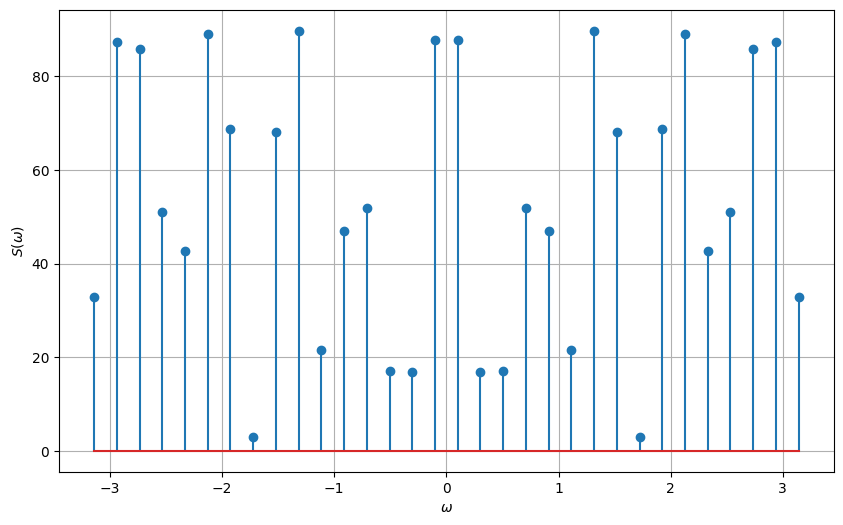

In [ ]:
w = np.linspace(-np.pi, np.pi, 32)

spectrum = lambda w, y: sum(y[i] * np.exp(-1j * w * i) for i in range(len(y)))

plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)))
plt.grid()
plt.show()

###4-5. Для дискретного сигнала применим линейное сглаживание по 5-ти и 9-ти точкам, представим формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.
###И далее визуализируем полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

Сглаживание по 5-ти точкам:

####$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$

$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)}{5}$

По 9-ти точкам:

####$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$

$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega)}{9}$

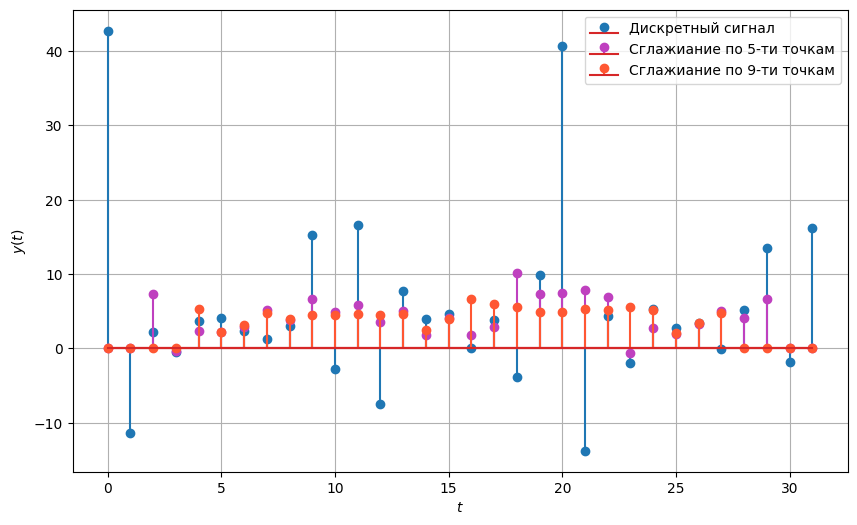

In [ ]:
smoothing_5 = lambda y: np.array([(y[i-2] + y[i-1] + y[i] + y[i+1] + y[i+2])/5 if 2 <= i < len(y)-2 else 0 for i in range(len(y))])

smoothing_9 = lambda y: np.array([(y[i-4] + y[i-3] + y[i-2] + y[i-1] + y[i] + y[i+4] + y[i+3] + y[i+2] + y[i+1])/9 if 4 <= i < len(y)-4 else 0 for i in range(len(y))])

plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, y_d, label="Дискретный сигнал")
plt.stem(N_arg, smoothing_5(y_d), label="Сглажиание по 5-ти точкам", linefmt='#BF40BF')
plt.stem(N_arg, smoothing_9(y_d), label="Сглажиание по 9-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

###6. С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отчетами спектра исходного дискретного сигнала.

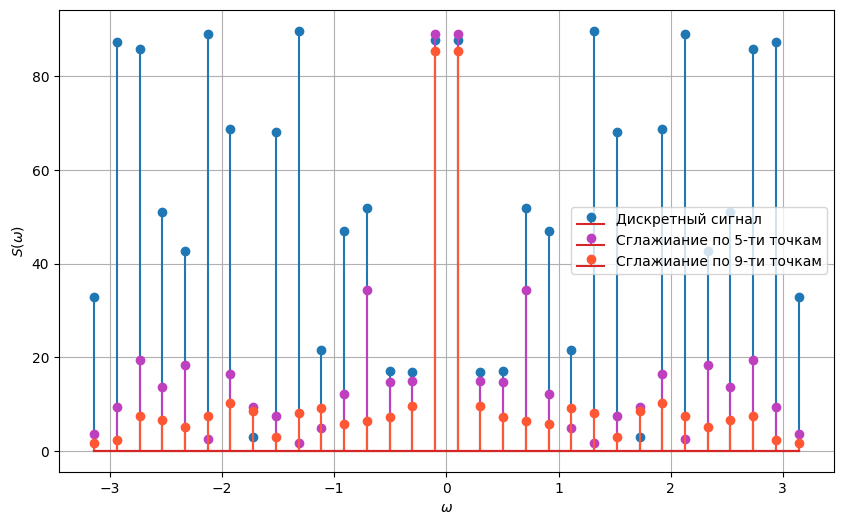

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)), label="Дискретный сигнал")
plt.stem(w, np.abs(spectrum(w, smoothing_5(y_d))), label="Сглажиание по 5-ти точкам", linefmt='#BF40BF')
plt.stem(w, np.abs(spectrum(w, smoothing_9(y_d))), label="Сглажиание по 9-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

###7. Проанализируем результат на соответствие значениям $H(ω)$.
На вышеприведённых графиках можно заметить, что чем больше точек используется при фильтрации, тем меньше полоса пропускания и тем быстрее падает амлитуда по мере роста частоты. Эти свойства согласуются со свойствами передаточных функций, установленными в третьей практической работе.

###8. Повторим п. 4–7 для следующих фильтров:
**a.Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.**

**b.Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).**

###Пункт 8a.
Численное дифференцирование первого порядка:

####$y_n= \frac {s_{n+1} - s_{n−1}} 2$

$H(\omega) = i\sin (\omega)$

####a-4, 5)

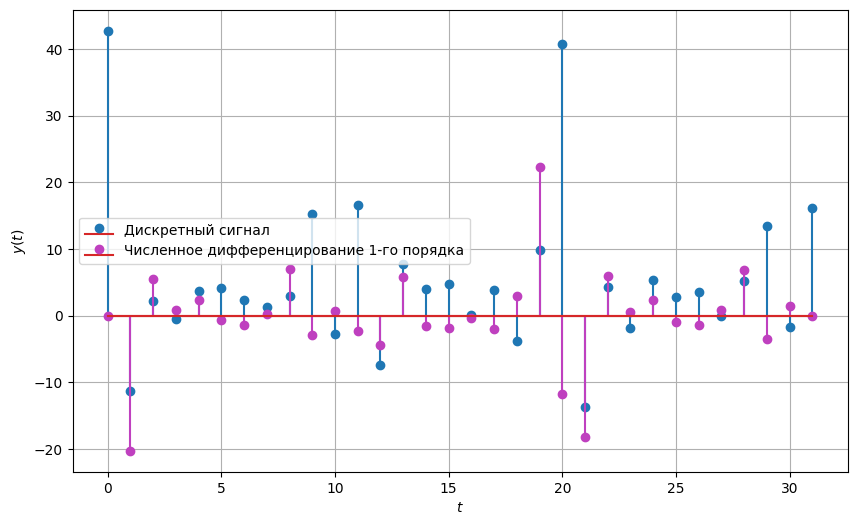

In [ ]:
num_diff_1 = lambda y: np.array([(y[i+1]-y[i-1])/2 if 1 <= i < len(y)-1 else 0 for i in range(len(y))])

plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, y_d, label="Дискретный сигнал")
plt.stem(N_arg, num_diff_1(y_d), label="Численное дифференцирование 1-го порядка", linefmt='#BF40BF')
plt.legend()
plt.grid()
plt.show()

####a-6)

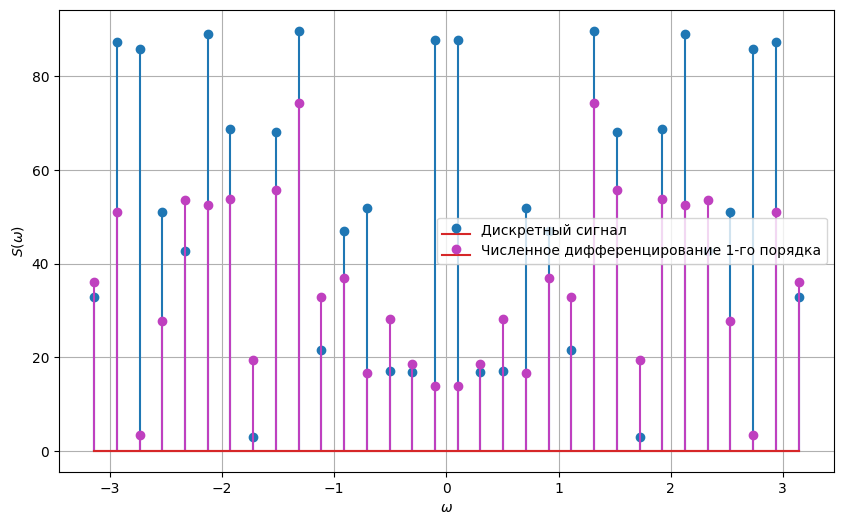

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)), label="Дискретный сигнал")
plt.stem(w, np.abs(spectrum(w, num_diff_1(y_d))), label="Численное дифференцирование 1-го порядка", linefmt='#BF40BF')
plt.legend()
plt.grid()
plt.show()

####a-7)
Приведём для начала частотные характеристики данного фильтра.

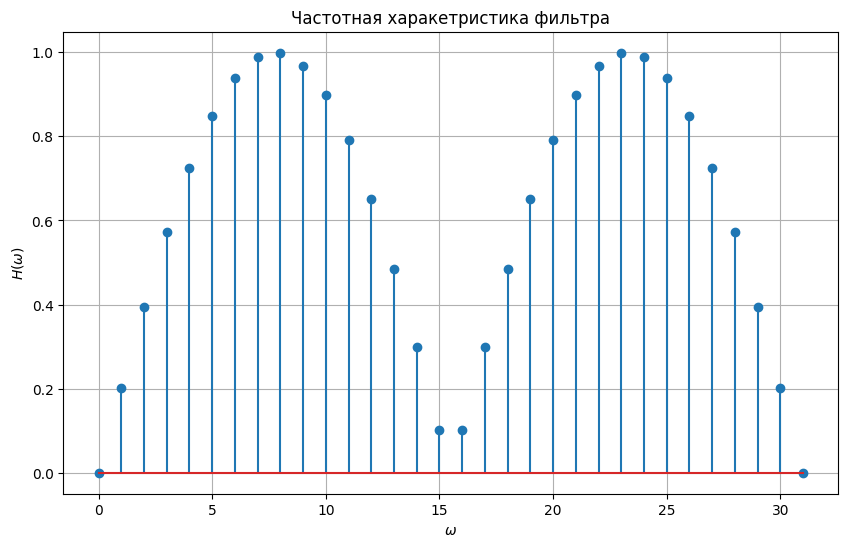

In [ ]:
H_num_diff = lambda x: np.abs(1j*np.sin(x))

plt.figure(figsize=(10, 6))
plt.xlabel('$\omega$')
plt.ylabel('$H(\omega)$')
plt.title('Частотная харакетристика фильтра')
plt.stem(N_arg, H_num_diff(w))
plt.grid()
plt.show()

По графикам спектров видно, что низкие и высокие частоты довольно сильно подавляются, в то время как средние частоты сохраняются, либо подавляются не так сильно. Отсюда можно сделать, вывод, что свойства фильтрации численным дифференцированием 1-го порядка сохраняют свойства передаточной функции.

###Пункт 8b.
Численное интегрирование с помощью формулы прямоугольников:

$y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$

$H(\omega) = \frac 1 {2i \sin {\frac \omega 2}}$

Численное интегрирование с помощью формулы трапеций:

$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$

$H(\omega) = \frac {\cos {\frac \omega 2}}{2i \sin {\frac \omega 2}}$

Численное интегрирование с помощью формулы Симпсона:

$y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$

$H(\omega) = \frac {\cos {\omega} + 2}{3i \sin {\omega}}$

####b-4, 5)

In [ ]:
rectangle = lambda y: np.cumsum([0] + [val for i, val in enumerate(y[1:], start=1)])

trap = lambda y: np.cumsum([0] + [(val + y[i-1])/2 for i, val in enumerate(y[1:], start=1)])

def simpson(y):
  new_y = np.convolve(y, np.array([1, 4, 1]), 'same')/3
  res = np.zeros_like(new_y)
  for i in range(2, len(new_y)):
    res[i] = res[i-2] + new_y[i-1]
  return res

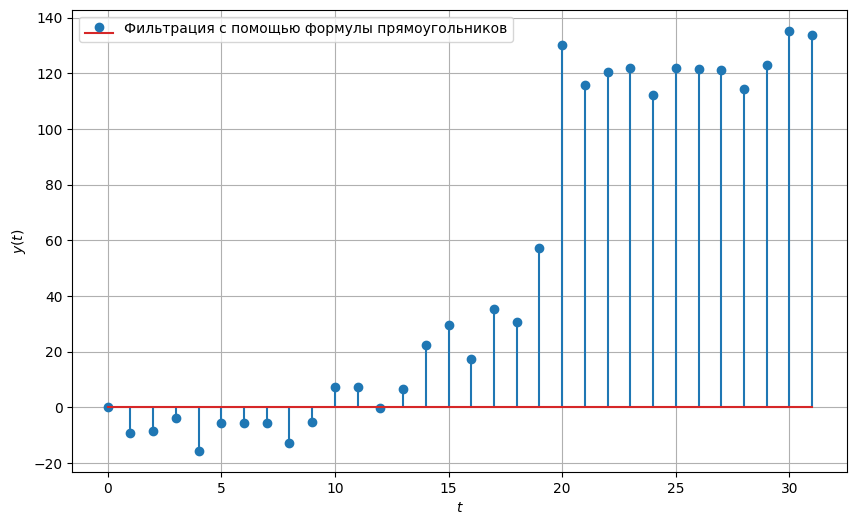

In [ ]:
plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, rectangle(y_d), label="Фильтрация с помощью формулы прямоугольников")
plt.legend()
plt.grid()
plt.show()

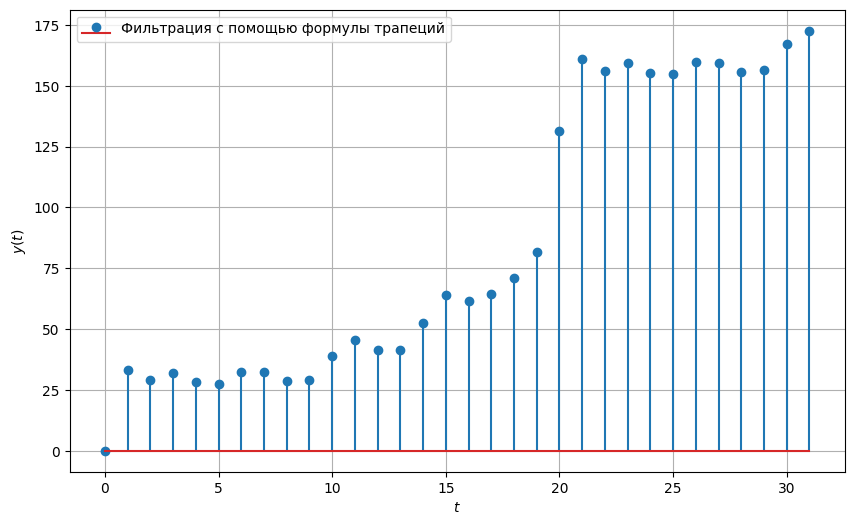

In [ ]:
plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, trap(y_d), label="Фильтрация с помощью формулы трапеций")
plt.legend()
plt.grid()
plt.show()

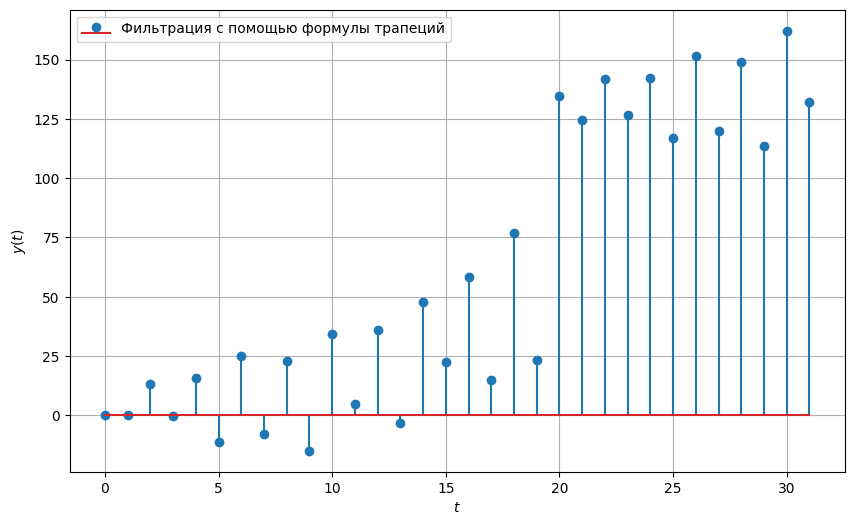

In [ ]:
plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, simpson(y_d), label="Фильтрация с помощью формулы трапеций")
plt.legend()
plt.grid()
plt.show()

####b-6)

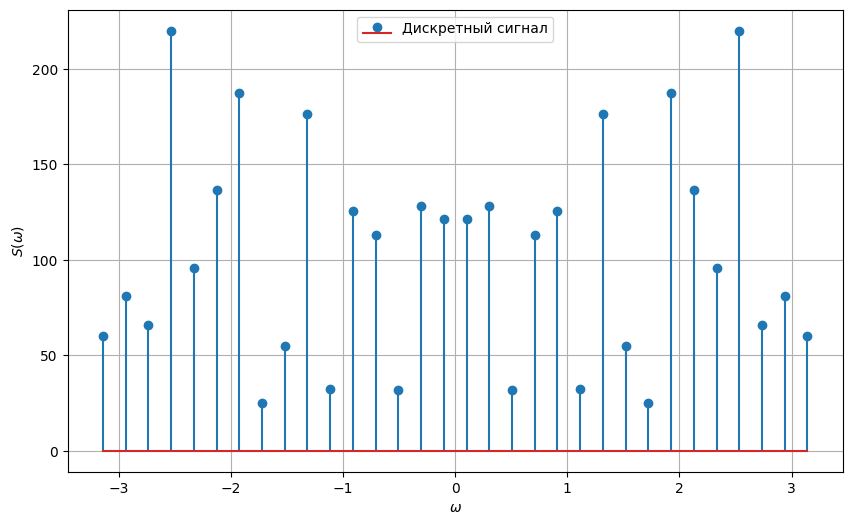

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)), label="Дискретный сигнал")
plt.legend()
plt.grid()
plt.show()

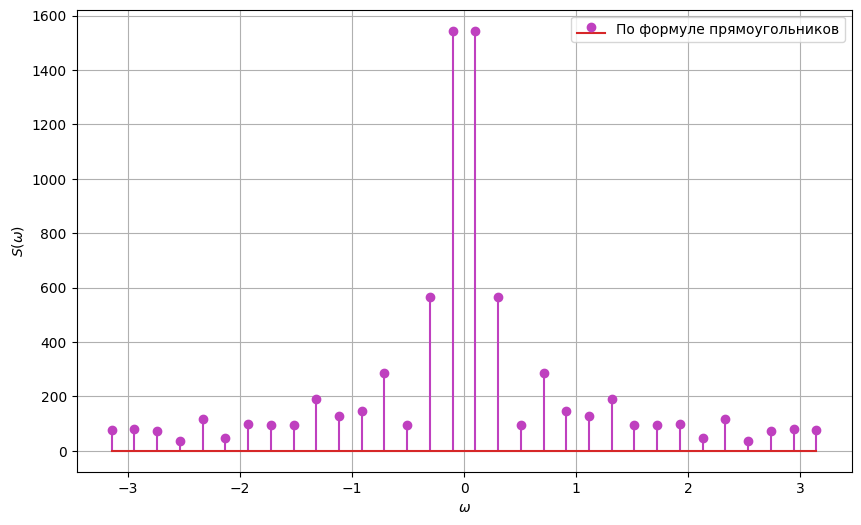

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, rectangle(y_d))), label="По формуле прямоугольников", linefmt='#BF40BF')
plt.legend()
plt.grid()
plt.show()

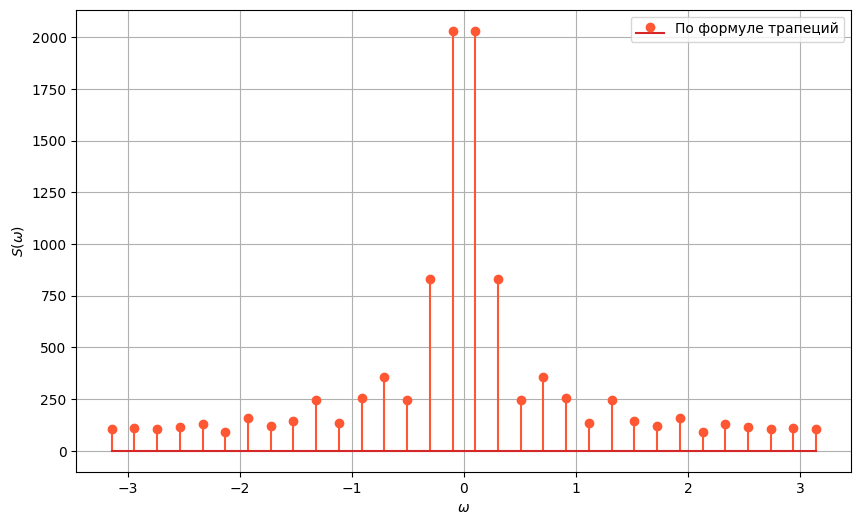

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, trap(y_d))), label="По формуле трапеций", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

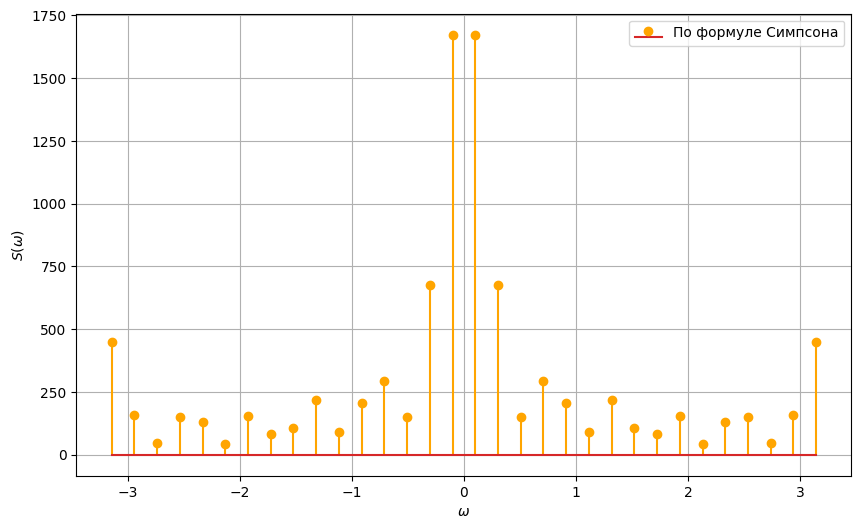

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, simpson(y_d))), label="По формуле Симпсона", linefmt='#FFA500')
plt.legend()
plt.grid()
plt.show()

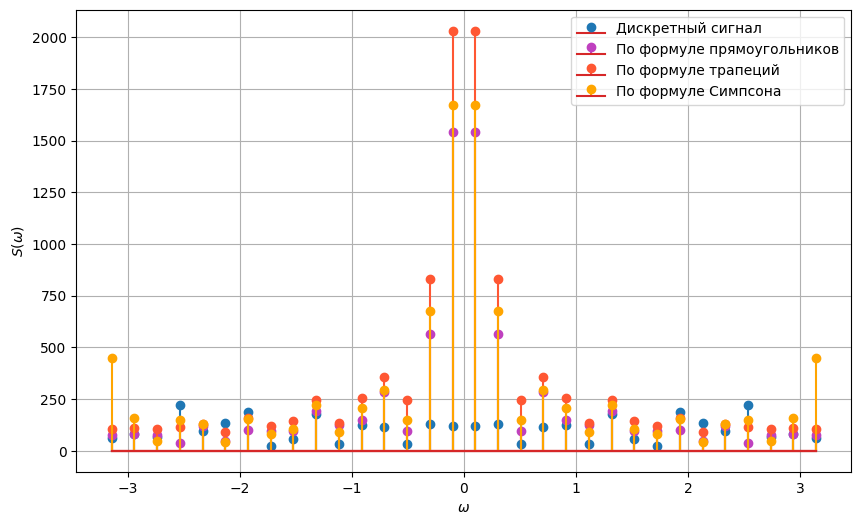

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)), label="Дискретный сигнал")
plt.stem(w, np.abs(spectrum(w, rectangle(y_d))), label="По формуле прямоугольников", linefmt='#BF40BF')
plt.stem(w, np.abs(spectrum(w, trap(y_d))), label="По формуле трапеций", linefmt='#FF5733')
plt.stem(w, np.abs(spectrum(w, simpson(y_d))), label="По формуле Симпсона", linefmt='#FFA500')
plt.legend()
plt.grid()
plt.show()

####b-7)
Аналогично с пунктом 8a можно заключить, что свойства фильтров, основанных на численном интегрировании, соответсуют свойствам их передаточных функций. Сами же передаточные функции этих фильтров были исследованы в практической работе №4.По графикам спектров видно, что фильтр по формуле Симпсона усиливает сигнал на всём частотном диапазоне, а фильтр по формулам прямоугольников и трапеций усиливают сигнал только на низких и высоких частотах.

## Выводы

В ходе выполнения практической работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

Для заданного дискретного сигнала были применены фильтры, основанные на сглаживании полиномами 1-й по 5-ти и 9-ти точкам,  на численном дифференцировании 1-го порядка и на численном интегрировании (формулы прямугольников, трапеций и Симпсона). Полученные после фильтрации дискретные сигналы совместно с исходным дискретным сигналом были визуализированны.

С помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отчетами спектра исходного дискретного сигнала.

Фильтры были проанализированы на соответствие их передаточным функциям. Анализ показал следующее:
1. Свойства сигналов, отфильтрованных по указанным формулам, соотвествуют характеристикам передаточных функций.
2. Формулы численного интегрирования позволяют усиливать сигнал.
3. Численное дифференцирование позволяет подавлять сигнал.
4. Для фильтра на основе линейного сглаживания выявлено, что крутизна спада амлитуды тем больше, чем больше точек используется для сглаживания.